# 10 Instructor Led Lab
Author: Mark Lannen  
Course: BGEN632 Grad. Intro. to Python  
Term: Spring 2025

## Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Set working directory and load data into dataframe

In [2]:
os.chdir("/Users/markl1/Documents/Studies/Grad_School-MBA/Spring_2025/Python/week10labs/data")

df = pd.read_csv("calihospital.txt", delimiter="\t")
df

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,www.scrippshealth.org,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,...,530,411280,Manin,Emily,F,1,Regional Representative,46978,4,1/1/2011
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,www.memorialcare.org,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,...,462,310431,Dong,HongWei,F,4,Safety Inspection Member,23987,2,1/1/2012
58,22460,Stanford Hospital & Clinics,94305,stanfordhospital.org,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,...,445,380668,Smith,Mary,F,4,Safety Inspection Member,23987,2,1/1/2012
59,33192,California Pacific Medical Center - Pacific Ca...,94115,www.cpmc.org,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,...,730,308150,Fourier,Craig,M,1,Regional Representative,46978,4,1/1/2011


## Select 7 numerical hospital values and create new dataframe.

In [3]:
hospital_df = df[["NoFTE", "NetPatRev", "InOperExp", "OutOperExp", "OperRev", "OperInc", "AvlBeds"]]
hospital_df

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,327.0,1.355202e+05,2.052343e+07,3.491622e+07,49933713,-5505933,15
1,345.0,1.361567e+05,3.344754e+07,2.034860e+07,53351748,-444391,99
2,601.2,1.970943e+05,3.725418e+07,3.783245e+07,72933707,-2152920,107
3,400.0,1.391704e+05,2.338557e+07,2.466136e+07,51087341,3040415,55
4,262.0,1.167978e+05,1.368450e+07,1.515999e+07,42845642,14001153,42
...,...,...,...,...,...,...,...
56,2814.0,1.321032e+06,3.791029e+08,1.064302e+08,491523782,5990693,530
57,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,439084836,38508125,462
58,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,1650391999,59273999,445
59,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,1074256998,144445998,730


## Scale the data using StandardScaler

In [4]:
scaler = StandardScaler()
hospital_scaled = scaler.fit_transform(hospital_df)
hospital_scaled

array([[-5.09437453e-01, -4.90650630e-01, -5.19671633e-01,
        -4.05713715e-01, -4.89551239e-01, -7.54073702e-02,
        -8.15994441e-01],
       [-5.00476059e-01, -4.90065895e-01, -4.73589791e-01,
        -5.12702954e-01, -4.81441776e-01, -4.07355392e-03,
        -4.34188623e-01],
       [-3.72925552e-01, -4.34081799e-01, -4.60016965e-01,
        -3.84296016e-01, -4.34982578e-01, -2.81523611e-02,
        -3.97826164e-01],
       [-4.73094022e-01, -4.87297182e-01, -5.09466457e-01,
        -4.81028683e-01, -4.86814197e-01,  4.50388531e-02,
        -6.34182146e-01],
       [-5.41798042e-01, -5.07851121e-01, -5.44056290e-01,
        -5.50809744e-01, -5.06368049e-01,  1.99511793e-01,
        -6.93271142e-01],
       [-4.74338660e-01, -4.01551327e-01, -4.62053940e-01,
        -3.92324734e-01, -4.04436452e-01,  1.76754035e-01,
        -5.84183765e-01],
       [-4.21566007e-01, -4.18075813e-01, -4.76222323e-01,
        -3.42144025e-01, -4.20577947e-01,  4.05795366e-02,
        -5.8872907

## Run Principal Component Analysis

In [5]:
pca = PCA()
pca.fit(hospital_scaled)

PCA()

## Extract Eigen Values

In [6]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[5.72134563e+00 1.07657967e+00 1.91383827e-01 9.31699632e-02
 3.29143500e-02 1.27322677e-03 5.91419821e-22]


## Convert values to decimal

In [7]:
values = [5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
          3.29143500e-02, 1.27322677e-03, 5.91419821e-22]


decimal_values = [f"{v:.20f}" for v in values]

for d in decimal_values:
    print(d)

5.72134563000000007094
1.07657967000000009961
0.19138382700000000636
0.09316996319999999721
0.03291435000000000194
0.00127322677000000009
0.00000000000000000000


## Based on the eigenvalues, explain how many variables you should keep

To quote the tutorial: 'A component with an eigenvalue greater than or equal to 1.0 is considered influential.'  

This means we should keep the first two values: NoFTE(5.72134563000000007094) and NetPatRev(1.07657967000000009961).

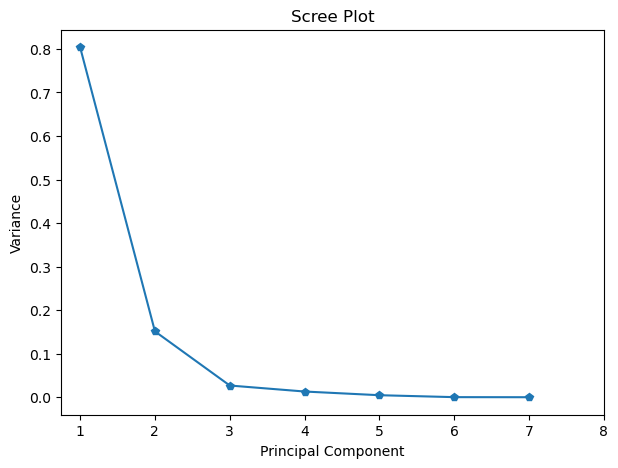

In [31]:
# Scree plot using explained variance ratio
plt.figure(figsize=(7, 5))
plt.plot(range(1, 8), pca.explained_variance_ratio_, marker='p')
plt.ylabel('Variance') 
plt.xlabel('Principal Component') 
plt.xlim(0.75, 7.25) 
# plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7,8])
plt.title("Scree Plot")

plt.show()

## Analysis
Based on the scree plot I should keep the first 2 components as they have the hightest rate of variance. The plot shows the 'elbow' after the second component, which means there is a diminishing return on information beyond that point.